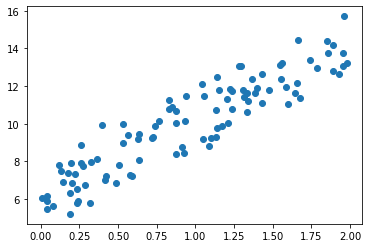

In [1]:
## 5.3 Gradient Descent

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# 매번 무작위가 아니라 고정된 무작위를 뽑기 위한 기본 세팅
np.random.seed(0)

# 0~1까지의 랜덤한 수를 100개 뽑는데 2차원으로 만들어달라
X = 2 * np.random.rand(100,1)
# 4x+6에다가 노이즈 추가, 노이즈: 평균 0, 표준편차 1인 랜덤한 수를 100개 뽑는데 2차원으로 만들어달라
y = 6 + 4 *X + np.random.randn(100, 1)

# 시각화 툴이라고 생각하면 된다
plt.scatter(X, y)


In [2]:
# 둘다 2차원인걸 알수 있다. 
X.shape, X.ndim, y.shape, y.ndim

((100, 1), 2, (100, 1), 2)

In [3]:
# w1과 w0을 업데이트 하는 함수 생성
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # zeros_ilke는 변수만큼의 사이즈로 (0)을 깔아준다. 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # y_pred(예측값) = w0 + x1*w1 + ... + xn*wn을 표현 
    y_pred = np.dot(X, w1.T) + w0
    # (실제값 - 예측값)
    diff = y - y_pred
    
    # w0_update를 1,1 shape으로 만들기 위한 행렬
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트, w1은 x *(실-예)이고, w0은 1*(실-예)니까 1로 된 행렬을 곱해준다. 
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)

(100, 1)
(1, 1) (1, 1)


In [5]:
# 반복적으로 경사 하강법을 적용
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
def get_cost(y, y_pred):
    N = len(y)
    # r(cost) = 1/n * 합(실제 - 예측)^2
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1: {0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.022 w0:6.162
Gradient Descent Total Cost:0.9935


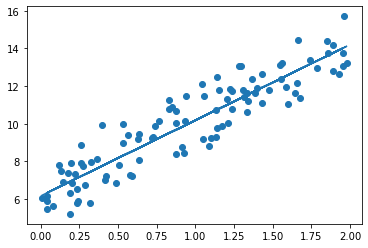

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [8]:
# 나머진 같고, 배치로 뽑아서 돌리는 부분만 다르다
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 100개의 인덱스(숫자)를 랜덤순서로 섞고
        stochastic_random_index = np.random.permutation(X.shape[0])
        # 섞은 숫자들중 10개에 해당하는 인덱스 번호의 값들을 저장
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 10개 batch값들로 바꿔서 다시 w1, w0 경사하강법 수행
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0
    

In [9]:
# np.random.permutation(X.shape[0])

In [10]:
# X[np.random.permutation(X.shape[0])[0:10]]

In [11]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print(w1, w0)
print('Total Cost:', get_cost(y, y_pred))

[[4.02826291]] [[6.15645891]]
Total Cost: 0.9934784315632568


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)

bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


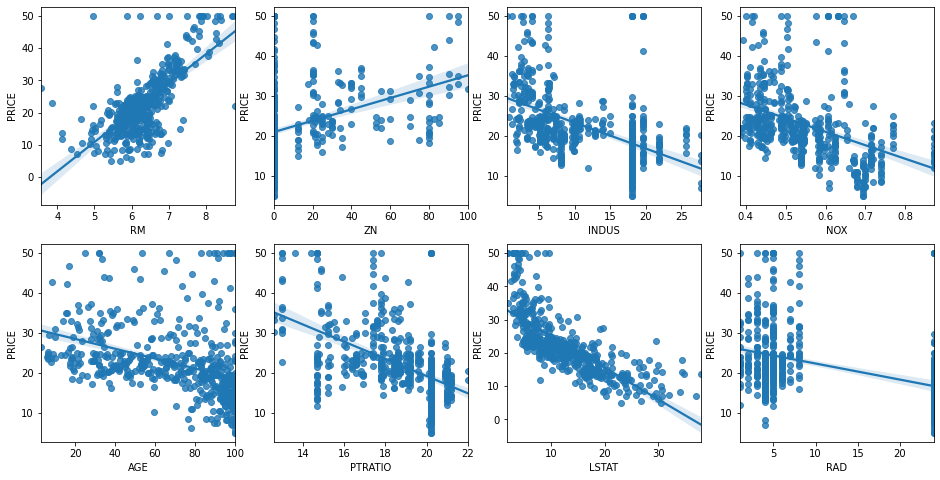

In [13]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# row, col은 걍 (0,0), (0,1), ... , (1,3)을 찍기위한거라고 보면 됨
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [14]:
# 학습과 테스트 데이터 세트로 분리 및 학/예/평
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 분리하기
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 학/예/평
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('mse:{0:.3f}, rmse:{1:.3f}'.format(mse, rmse))
print('Variance Score:{0:.3f}'.format(r2_score(y_test, y_preds)))



mse:17.297, rmse:4.159
Variance Score:0.757


In [15]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE:', np.round(avg_rmse, 2))


5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.83


In [18]:
# 다항회귀, 다항식 변환: 폴리피쳐스 부른다음에, fit, transform 해주면 된다. 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

X[:,0]

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


array([0, 2])

In [19]:
# 선형회귀에다가는 3차변환한 다항식, 결정값을 넣어주면 된다. 
from sklearn.linear_model import LinearRegression
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 y:\n', y)

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature인 poly_ftr:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('선형회귀 계수 및 shape', np.round(model.coef_, 2), model.coef_.shape)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 y:
 [  5 125]
3차 다항식 계수 feature인 poly_ftr:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
선형회귀 계수 및 shape [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34] (10,)


In [20]:
# 사이킷런의 pipleline을 이용하면 한번에 변환+선형회귀를 수행한다
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# 1, 2 순서대로 튜플형태로 할거를 넣으면 된다. 앞에 키는 넣고싶은거 넣는건데 가독성 좋게 넣은 것임
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(0,4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('poly 회귀 계수:', np.round(model.named_steps['linear'].coef_, 2))

    

poly 회귀 계수: [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [21]:
## 다항 회귀를 이용한 보스턴 주택가격 예측

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
print('boston dataset size:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# include_bias=True가 default인데(X0 변수가 추가됨), False로 놓으면 개선이 될 수도 있다. 다만 degree가 높으면 오버피팅이 된다. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance Score: {0:.3f}'.format(r2_score(y_test, y_preds)))

boston dataset size: (506, 14)
MSE: 15.556, RMSE: 3.944
Variance Score: 0.782


In [22]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

## 다항회귀를 이용한 과소적합 및 과적합 이해
### -너무 단항이면 과소적합(high bias, low variance, 일관성은 있는데 데이터들을 쌩까는 비중이 높다.)
### -너무 다항이면 과적합(low bias, high variance, 너무 모든 데이터들을 챙기니까 일관성이 없다. )

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# cos 그래프
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 cos 그래프에서 약간의 noise 변동값을 더해서 구성한다
y = true_fun(X) + np.random.randn(n_samples) * 0.1

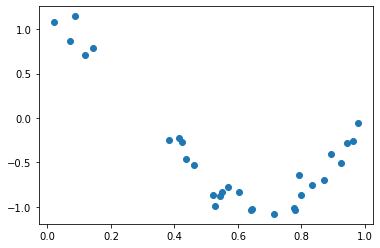

In [26]:
plt.scatter(X, y)

nDegree 1 회귀계수는 [-2.]
Degree 1 MSE 0.41
nDegree 4 회귀계수는 [  0. -18.  24.  -7.]
Degree 4 MSE 0.04
nDegree 15 회귀계수는 [-2.98300000e+03  1.03900000e+05 -1.87417000e+06  2.03717200e+07
 -1.44874017e+08  7.09319141e+08 -2.47067172e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920642e+09 -1.70382078e+08]
Degree 15 MSE 182581084.83


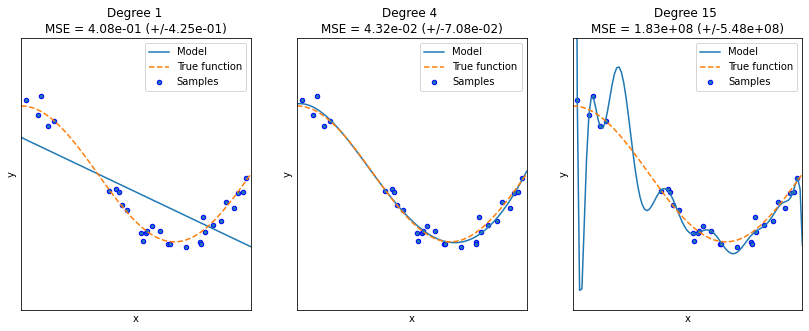

In [27]:
plt.figure(figsize=(14,5))
# 다항 회귀의 차수를 1, 4, 15로 변화시키면서 비교
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())    
    
    # 개별 degree 별로 다항 변환하고 파이프라인(변환+선형회귀) 적용
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), 
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('nDegree {0} 회귀계수는 {1}'.format(degrees[i], np.round(coefficients), 2))
    print('Degree {0} MSE {1:.2f}'.format(degrees[i], -1*np.mean(scores)))
    
    #걍 0부터 1까지를 100개의 숫자들로 나눔
    X_test = np.linspace(0, 1, 100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {} \nMSE = {:.2e} (+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
    
    
    

In [28]:
## 규제 선형 회귀, 릿지와 라소 
# 릿지부터 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# boston 데이터 셋 로드 
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print('boston dataset size:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# alpha값은 디폴트가 1인데, 임의로 10을 줘봤음
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE:', np.round(avg_rmse, 3))

boston dataset size: (506, 14)
5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [30]:
# 위는 알파=10일때 얘기고, 0~100 변경해가면서 체크해보자
# 동 사례에서는 알파가 100일때가 가장 점수가 낮다(좋다)
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rsme = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} : 5 folds average RSME: {1:.3f}'.format(alpha, avg_rsme))

alpha 0 : 5 folds average RSME: 5.829
alpha 0.1 : 5 folds average RSME: 5.788
alpha 1 : 5 folds average RSME: 5.653
alpha 10 : 5 folds average RSME: 5.518
alpha 100 : 5 folds average RSME: 5.330


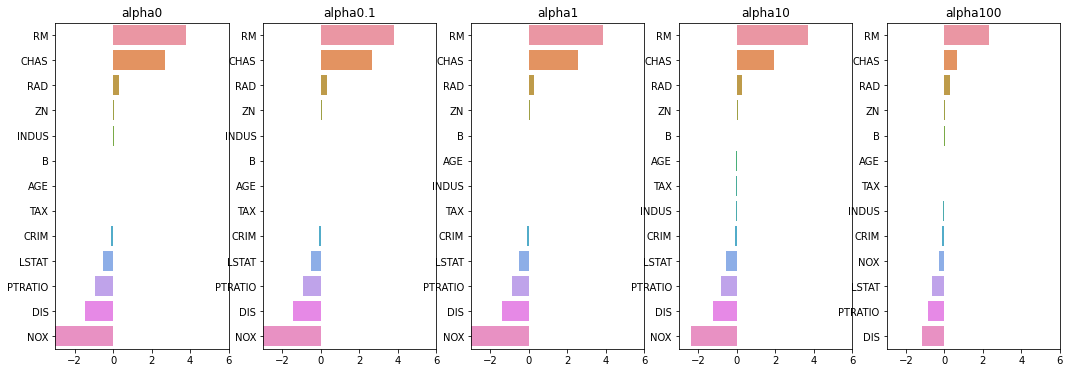

In [43]:
# alpha에 따른 회귀 계수 값을 시각화 
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    
    # 이건 걍 네이밍할라고 만든거
    colname = 'alpha'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [56]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha0,alpha0.1,alpha1,alpha10,alpha100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 라쏘 회귀
### 릿지는 회귀계수가 조정됨, 라쏘는 해당 회귀계수를 날려버림

In [58]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
            


In [59]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)

###### Lasso ######
alpha 0.07 일때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5 일때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1 일때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3 일때 5 폴드 세트의 평균 RMSE: 6.189


In [76]:
sort_column = 'alpha' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [77]:
## 엘라스틱넷 회귀
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07 일때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5 일때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1 일때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3 일때 5 폴드 세트의 평균 RMSE: 6.068


In [78]:
sort_column = 'alpha' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

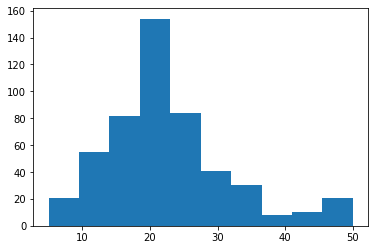

In [83]:
# 타겟값은 비교적 정규분포를 따르므로 해당 사례에서는 건들지 않음
print(y_target.shape)
plt.hist(y_target, bins=10)

In [84]:
# 각 alpha값에 따라 1)원본데이터, 2)표준정규분포, 3)표준+2차다항식, 4)minMax정규화, 5) minMax+2차다항식, 6)로그변환
# 참고로 로그변환이 대체로 유의미한 개선을 가지고 옴, 다항식 변환은 오버피팅을 항상 염두에 둬야 한다. 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data
        

In [86]:
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1 일때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10 일때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100 일때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1 일때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10 일때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100 일때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1 일때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10 일때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100 일때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1 일때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10 일때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100 일때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1 일때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10 일때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100 일때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE: 4.770

In [90]:
X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(3)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])